In [1]:
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/Patilanuj/Python_Projects/refs/heads/main/ML%20models/Logistic%20Regression/Credit_Card_Default_Prediction/UCI_Credit_Card.csv'
df= pd.read_csv(url)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [2]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

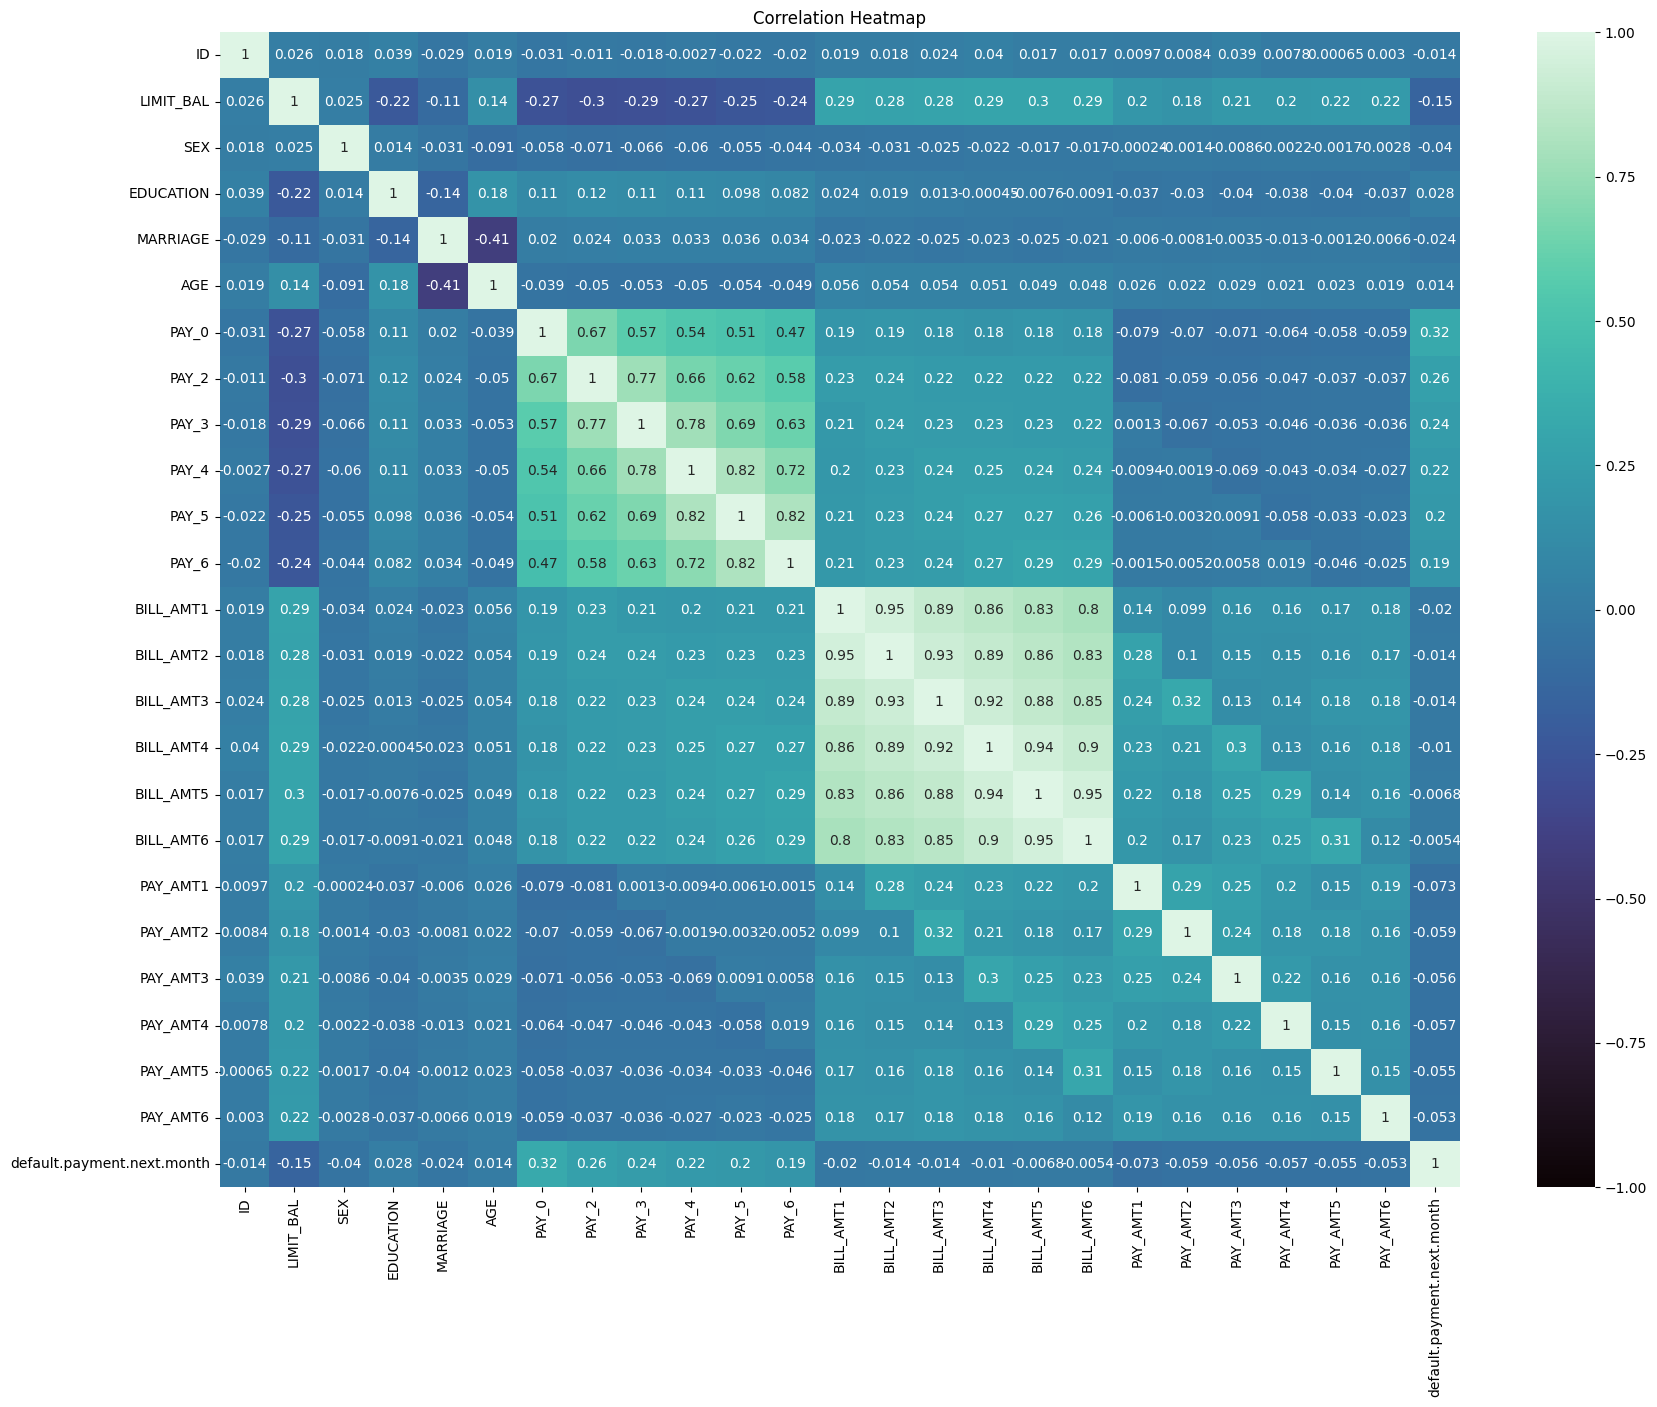

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

In [4]:
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [5]:
df["SEX"] = df["SEX"].replace(2, 0)
df["SEX"].value_counts()

SEX
0    18112
1    11888
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
cols=['AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df[cols]=se.fit_transform(df[cols])
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,0,2,1,-1.246020,1.794564,1.782348,-0.696663,-0.666599,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,120000.0,0,2,2,-1.029047,-0.874991,1.782348,0.138865,0.188746,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,90000.0,0,2,2,-0.161156,0.014861,0.111736,0.138865,0.188746,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,50000.0,0,2,1,0.164303,0.014861,0.111736,0.138865,0.188746,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,50000.0,1,2,1,2.334029,-0.874991,0.111736,-0.696663,0.188746,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [8]:
ct=ColumnTransformer(transformers=[('encode', OneHotEncoder(), ['EDUCATION', 'MARRIAGE'])], remainder = 'passthrough')
x_transform=ct.fit_transform(df)

In [9]:
x_transform

array([[ 0.        ,  1.        ,  0.        , ..., -0.31413612,
        -0.29338206,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.31413612,
        -0.18087821,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.24868274,
        -0.01212243,  0.        ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.18322937,
        -0.11900109,  1.        ],
       [ 0.        ,  0.        ,  1.        , ...,  3.15253642,
        -0.19190359,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.24868274,
        -0.23713013,  1.        ]], shape=(30000, 31))

In [10]:
df=pd.DataFrame(x_transform, columns=ct.get_feature_names_out(), index= df.index)
df.head()

,encode__EDUCATION_1,encode__EDUCATION_2,encode__EDUCATION_3,encode__EDUCATION_4,encode__MARRIAGE_0,encode__MARRIAGE_1,encode__MARRIAGE_2,encode__MARRIAGE_3,remainder__ID,remainder__LIMIT_BAL,...,remainder__BILL_AMT4,remainder__BILL_AMT5,remainder__BILL_AMT6,remainder__PAY_AMT1,remainder__PAY_AMT2,remainder__PAY_AMT3,remainder__PAY_AMT4,remainder__PAY_AMT5,remainder__PAY_AMT6,remainder__default.payment.next.month
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,20000.0,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,120000.0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,90000.0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,50000.0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,50000.0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0.0


In [11]:
# Separate target
y = df['remainder__default.payment.next.month']
# Separate features (drop target column)
X = df.drop(columns=['remainder__default.payment.next.month'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=80)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8026666666666666
Confusion Matrix:
 [[4461  226]
 [ 958  355]]


C:\Users\Anuj\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, auc
)
import numpy as np
import statsmodels.api as sm

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 80.26666666666667 %
Confusion Matrix:
 [[4461  226]
 [ 958  355]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      4687
         1.0       0.61      0.27      0.37      1313

    accuracy                           0.80      6000
   macro avg       0.72      0.61      0.63      6000
weighted avg       0.78      0.80      0.77      6000



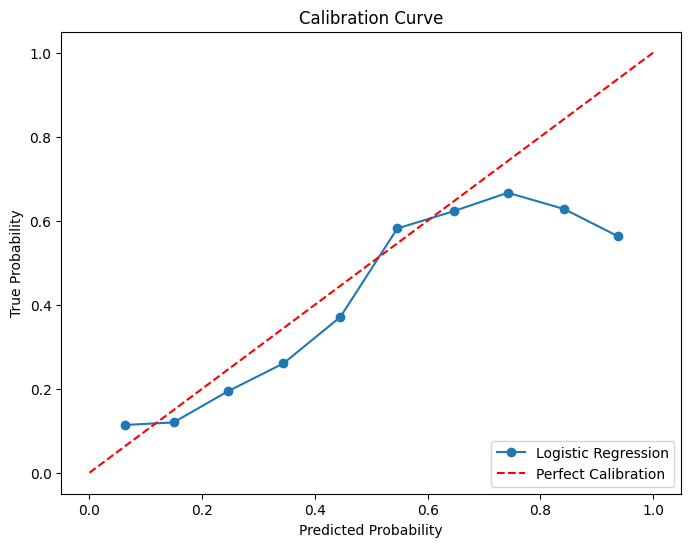

In [17]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# y_test = true labels, y_pred_prob = predicted probabilities
prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)

plt.figure(figsize=(8,6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')  # model line
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Perfect Calibration')  # reference
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend(loc='lower right')  # place legend nicely
plt.show()


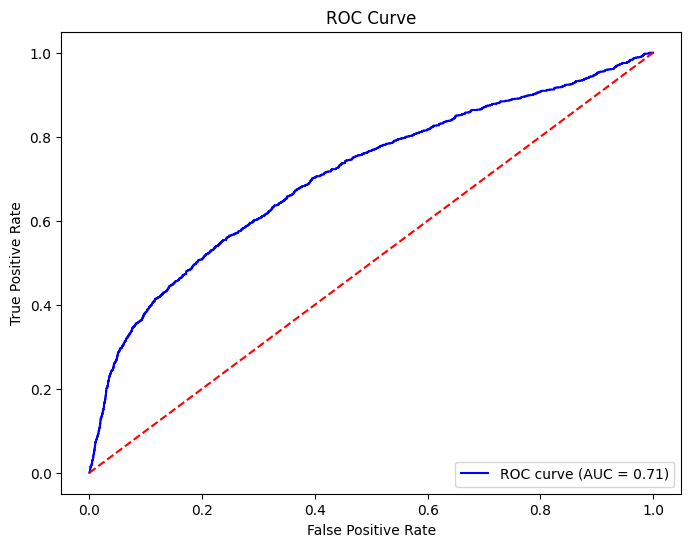

AUC: 0.7073186664155575


In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)

In [19]:
import statsmodels.api as sm

# Add intercept for statsmodels
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm).fit()

print(logit_model.summary())  # contains coefficients, p-values, pseudo-R²

Optimization terminated successfully.
         Current function value: 0.464391
         Iterations 7
                                     Logit Regression Results                                    
Dep. Variable:     remainder__default.payment.next.month   No. Observations:                24000
Model:                                             Logit   Df Residuals:                    23969
Method:                                              MLE   Df Model:                           30
Date:                                   Wed, 08 Oct 2025   Pseudo R-squ.:                  0.1224
Time:                                           11:55:23   Log-Likelihood:                -11145.
converged:                                          True   LL-Null:                       -12700.
Covariance Type:                               nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

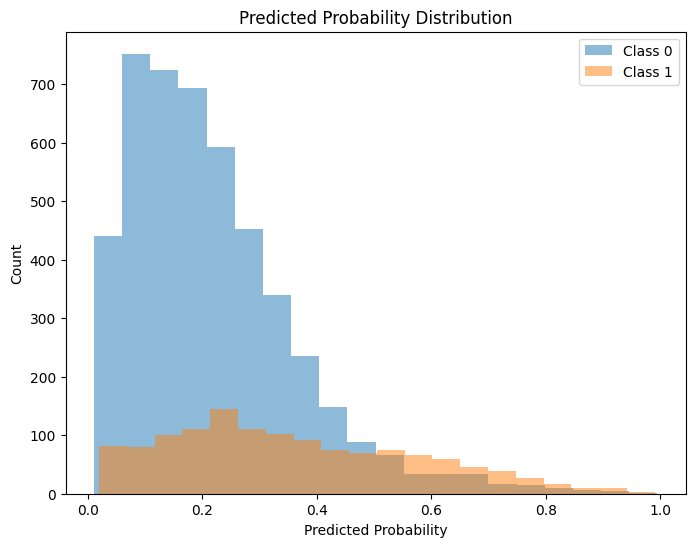

In [20]:
plt.figure(figsize=(8,6))
plt.hist(y_pred_prob[y_test==0], bins=20, alpha=0.5, label='Class 0')
plt.hist(y_pred_prob[y_test==1], bins=20, alpha=0.5, label='Class 1')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Predicted Probability Distribution')
plt.legend()
plt.show()
